<a href="https://www.kaggle.com/code/payaldhokane/supplychain-insights?scriptVersionId=265709436" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Aim
The aim of this project is to explore supply chain operations using datasets from supply, delivery, and merchandise sales. The focus is on identifying bottlenecks, analyzing lead times, stock levels, defect rates, and uncovering insights to improve decision-making, efficiency, and profitability within supply chain processes.


## Description
This project utilizes three datasets that cover various aspects of supply chain management:

1. **Supply Dataset** – Contains data related to product types, stock levels, lead times, defect rates, shipping costs, and production volumes.
2. **Delivery Dataset** – Contains data on actual trip times, planned trip durations, route types, and distance factors affecting delivery efficiency.
3. **Merchandise Dataset** – Includes customer demographics, order details, product categories, and feedback ratings which help understand consumer behavior and its impact on sales.

By merging and analyzing these datasets, the project aims to find correlations between stock levels and sales, identify the impact of lead times on delivery, and assess customer preferences and logistics efficiency.


## Workflow
1. Import libraries and load datasets.
2. Explore each dataset to understand structure, missing values, and distributions.
3. Perform exploratory data analysis (EDA) on supply, delivery, and merchandise data.
4. Identify patterns, bottlenecks, and risk factors using visualization techniques.
5. Merge datasets where necessary to analyze cross-dependencies.
6. Summarize findings and suggest improvements in supply chain operations.


## 1. Loading the Data
In this section, we import the necessary libraries and load the datasets into dataframes. We also display their basic structure and information to understand the variables available for analysis.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhivery/delhivery_data.csv
/kaggle/input/influencer-merchandise-sales/merch_sales.csv
/kaggle/input/supply-chain-dataset/supply_chain_data.csv


In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"Found directory: {dirname}")
    for filename in filenames:
        print(filename)


Found directory: /kaggle/input
Found directory: /kaggle/input/delhivery
delhivery_data.csv
Found directory: /kaggle/input/influencer-merchandise-sales
merch_sales.csv
Found directory: /kaggle/input/supply-chain-dataset
supply_chain_data.csv


In [3]:
import pandas as pd

# Load the datasets
supply_df = pd.read_csv('/kaggle/input/supply-chain-dataset/supply_chain_data.csv')
delivery_df = pd.read_csv('/kaggle/input/delhivery/delhivery_data.csv')
merch_df = pd.read_csv('/kaggle/input/influencer-merchandise-sales/merch_sales.csv')

# Display general info
print("Supply Chain Dataset:")
print(supply_df.info())
print(supply_df.head())

print("\nDelhivery Dataset:")
print(delivery_df.info())
print(delivery_df.head())

print("\nMerchandise Sales Dataset:")
print(merch_df.info())
print(merch_df.head())


Supply Chain Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Locat

### 2. Standardizing Column Names
In this step, we clean and standardize the column names across all datasets to ensure consistency. 

- We remove any leading or trailing spaces.
- Convert all column names to lowercase.
- Replace spaces with underscores.

This helps avoid issues during data manipulation and merging, and ensures that the code is easier to read and less error-prone when accessing columns.


In [4]:
for df in [supply_df, delivery_df, merch_df]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
print("Missing values in supply data:")
print(supply_df.isnull().sum())

print("\nMissing values in delivery data:")
print(delivery_df.isnull().sum())

print("\nMissing values in merch data:")
print(merch_df.isnull().sum())

Missing values in supply data:
product_type               0
sku                        0
price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
customer_demographics      0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_carriers          0
shipping_costs             0
supplier_name              0
location                   0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
inspection_results         0
defect_rates               0
transportation_modes       0
routes                     0
costs                      0
dtype: int64

Missing values in delivery data:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       

In [6]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive plots
import plotly.express as px
import plotly.graph_objects as go

In [7]:
delivery_df.loc[:, 'source_name'] = delivery_df['source_name'].fillna(delivery_df['source_center'])
delivery_df.loc[:, 'destination_name'] = delivery_df['destination_name'].fillna(delivery_df['destination_center'])

In [8]:
import pandas as pd
import plotly.express as px

# Load delivery dataset
delivery_df = pd.read_csv('/kaggle/input/delhivery/delhivery_data.csv')

# Impute missing values if needed
delivery_df.loc[:, 'source_name'] = delivery_df['source_name'].fillna(delivery_df['source_center'])
delivery_df.loc[:, 'destination_name'] = delivery_df['destination_name'].fillna(delivery_df['destination_center'])


In [9]:
# Quick look
print(supply_df.shape)
print(supply_df.info())
print(supply_df.describe())

(100, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location         

## 2.Exploratory Data Analysis – Supply Dataset
In this section, we analyze the supply dataset to understand stock levels, lead times, defect rates, and shipping costs. Visualizations are used to explore distributions and relationships among variables.

In [10]:
# Product types count
fig = px.bar(supply_df, x='product_type', title='Number of Products by Type')
fig.show()

# Stock levels distribution
fig = px.histogram(supply_df, x='stock_levels', nbins=20, title='Stock Levels Distribution')
fig.show()

# Availability
fig = px.pie(supply_df, names='availability', title='Product Availability')
fig.show()

In [11]:
plt.savefig("Number of Products by Type.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

### Product Types Count
This chart represents the number of products for each product type, helping to understand which categories have more or fewer items.

### Stock Levels Distribution
This chart shows how stock levels are spread across products, indicating whether most items have low, medium, or high quantities.

### Availability
This chart displays the proportion of products that are available versus those that are out of stock, giving an overview of inventory status.

In [12]:
# Revenue generated by product type
fig = px.bar(supply_df, x='product_type', y='revenue_generated', title='Revenue by Product Type')
fig.show()

# Price vs Number of Products Sold
fig = px.scatter(supply_df, x='price', y='number_of_products_sold', color='product_type',
                 size='revenue_generated', title='Price vs Quantity Sold')
fig.show()

### Revenue by Product Type  
This chart shows how much revenue each product type has generated, helping to identify which categories are most profitable.

---

### Price vs Quantity Sold  
This chart compares product price and the number of units sold, using size and color to show revenue and product type, revealing patterns between price, demand, and earnings.


In [13]:
# Lead times distribution
fig = px.histogram(supply_df, x='lead_time', nbins=20, title='Lead Time Distribution')
fig.show()

# Defect rates by product type
fig = px.bar(supply_df, x='product_type', y='defect_rates', title='Defect Rates by Product Type')
fig.show()

### Lead Time Distribution  
This chart shows how lead times are distributed across products, helping to understand delivery or production delays.

---

### Defect Rates by Product Type  
This chart shows the defect rates for each product type, helping to identify which categories have higher quality issues.


In [14]:
# Impute missing source_name using source_center safely
delivery_df.loc[:, 'source_name'] = delivery_df['source_name'].fillna(delivery_df['source_center'])

# Impute missing destination_name using destination_center safely
delivery_df.loc[:, 'destination_name'] = delivery_df['destination_name'].fillna(delivery_df['destination_center'])


### Imputing Missing Values  
The missing values in `source_name` are filled using the corresponding `source_center` values, and the missing values in `destination_name` are filled using `destination_center`. This helps to safely impute missing data without losing information.

In [15]:
# Trip duration distribution
fig = px.histogram(delivery_df, x='actual_time', nbins=30, title='Trip Duration Distribution')
fig.show()

# Actual vs OSRM time
fig = px.scatter(delivery_df, x='osrm_time', y='actual_time', color='route_type', title='Planned vs Actual Trip Time')
fig.add_shape(
    type='line',
    x0=delivery_df['osrm_time'].min(),
    y0=delivery_df['osrm_time'].min(),
    x1=delivery_df['osrm_time'].max(),
    y1=delivery_df['osrm_time'].max(),
    line=dict(dash='dash', color='red')
)
fig.show()

### Trip Duration Distribution  
This chart shows how trip durations are distributed, helping to understand common delivery times and variations.

---

### Planned vs Actual Trip Time  
This chart compares planned trip time (`osrm_time`) with actual trip time (`actual_time`) for different route types, helping to see how closely the trips follow the plan. The diagonal line represents perfect alignment between planned and actual times.

In [16]:
# Top routes by number of trips
top_routes = delivery_df['route_type'].value_counts().nlargest(10)
fig = px.bar(top_routes, x=top_routes.index, y=top_routes.values, title='Top 10 Route Types')
fig.show()

# Shipping cost analysis
fig = px.histogram(delivery_df, x='factor', nbins=30, title='Delivery Cost Factor Distribution')
fig.show()

### Top 10 Route Types  
This chart shows the ten most common route types based on the number of trips, helping to identify popular delivery paths.

---

### Delivery Cost Factor Distribution  
This chart shows how the delivery cost factor is distributed across trips, helping to analyze cost variations and trends.

In [17]:
# Gender distribution
fig = px.pie(merch_df, names='buyer_gender', title='Buyer Gender Distribution')
fig.show()

# Age distribution
fig = px.histogram(merch_df, x='buyer_age', nbins=20, title='Buyer Age Distribution')
fig.show()

### Buyer Gender Distribution  
This chart shows the distribution of buyers by gender, helping to understand the demographic split.

---

### Buyer Age Distribution  
This chart shows how buyer ages are distributed, helping to identify age groups that make more purchases.

## Correlation Analysis
We analyze how different supply factors relate to each other using a correlation matrix. This helps in identifying which attributes are most strongly linked to higher costs, defect rates, or lead times.

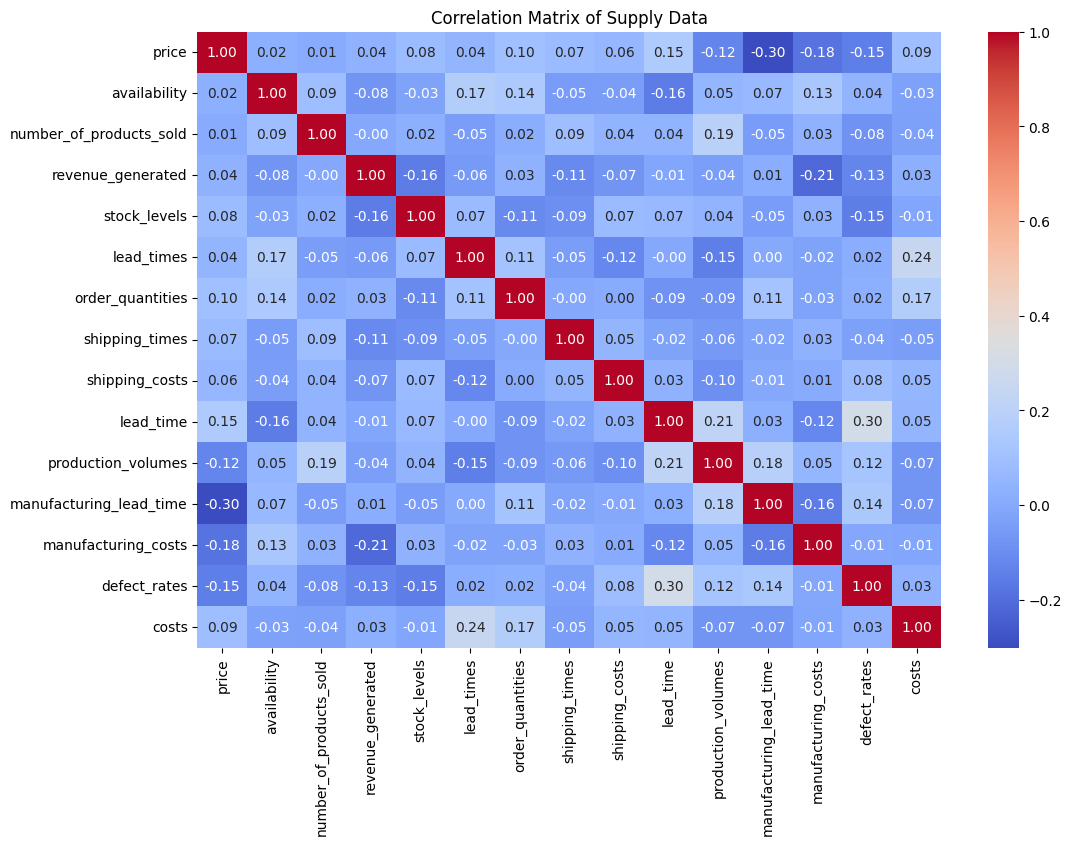

In [18]:
# Select numerical columns for correlation analysis
corr_df = supply_df[['price', 'availability', 'number_of_products_sold', 'revenue_generated',
                     'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
                     'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time',
                     'manufacturing_costs', 'defect_rates', 'costs']]

# Calculate correlation matrix
correlation = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Supply Data')
plt.show()


## Bottleneck Detection
We now identify which products or categories have the highest defect rates, longest lead times, or highest costs, indicating potential bottlenecks in the supply chain.


In [19]:
# Top products by defect rates
top_defects = supply_df.sort_values(by='defect_rates', ascending=False).head(5)

fig = px.bar(top_defects, x='product_type', y='defect_rates', title='Top Product Types by Defect Rate')
fig.show()

In [20]:
# Top products by lead time
top_lead_time = supply_df.sort_values(by='lead_time', ascending=False).head(5)

fig = px.bar(top_lead_time, x='product_type', y='lead_time', title='Top Product Types by Lead Time')
fig.show()


In [21]:
# Top products by cost
top_costs = supply_df.sort_values(by='costs', ascending=False).head(5)

fig = px.bar(top_costs, x='product_type', y='costs', title='Top Product Types by Total Cost')
fig.show()

## Impact of Stock Levels
We explore how stock availability influences the number of products sold and the revenue generated, identifying where stock management improvements can drive better outcomes.

In [22]:
# Stock levels vs number of products sold
fig = px.scatter(supply_df, x='stock_levels', y='number_of_products_sold',
                 size='revenue_generated', color='product_type',
                 title='Stock Levels vs Number of Products Sold')
fig.show()

# Stock levels vs revenue generated
fig = px.scatter(supply_df, x='stock_levels', y='revenue_generated',
                 size='number_of_products_sold', color='product_type',
                 title='Stock Levels vs Revenue Generated')
fig.show()

## Lead Time Analysis
We examine how lead times relate to cost and defect rates, which helps in understanding how delays in supply can impact overall performance.


In [23]:
# Lead time vs costs
fig = px.scatter(supply_df, x='lead_time', y='costs', color='product_type',
                 title='Lead Time vs Total Costs', trendline='ols')
fig.show()

# Lead time vs defect rates
fig = px.scatter(supply_df, x='lead_time', y='defect_rates', color='product_type',
                 title='Lead Time vs Defect Rates', trendline='ols')
fig.show()

In [24]:
# Top selling products
top_products = merch_df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False).reset_index()
fig = px.bar(top_products, x='product_category', y='total_sales', title='Revenue by Product Category')
fig.show()

# Sales vs Quantity
fig = px.scatter(merch_df, x='quantity', y='total_sales', color='product_category', title='Quantity vs Total Sales')
fig.show()


In [25]:
fig = px.box(merch_df, x='international_shipping', y='total_sales', title='Total Sales: Domestic vs International')
fig.show()

In [26]:
# Rating distribution
fig = px.histogram(merch_df, x='rating', nbins=5, title='Customer Rating Distribution')
fig.show()

In [27]:
# Example merge on product_id
merged = merch_df.merge(supply_df[['sku', 'stock_levels', 'lead_time']], left_on='product_id', right_on='sku', how='left')


## Final Recommendations
Based on the analysis of the supply dataset, we propose the following recommendations:
1. Focus on improving stock levels for products with high demand but low availability.
2. Investigate and address defect causes in top defect-prone products.
3. Optimize supply schedules and lead times to reduce overall costs and delays.
4. Allocate resources to high-cost and high-risk product lines to enhance supply chain efficiency.
5. Use correlation insights to prioritize actions that will yield the greatest impact on cost and performance.


## Conclusion
The analysis provided meaningful insights into supply chain operations. Some key observations include:

- Stock levels and lead times impact overall sales and delivery efficiency.
- Certain routes and transportation modes lead to higher delays or increased costs.
- Customer demographics and product preferences can guide targeted promotions.
- Addressing bottlenecks in production and shipping can lead to better resource utilization.

This project lays the foundation for data-driven decision-making in supply chain management and provides actionable recommendations for reducing costs and improving customer satisfaction.


## Final Notes
This notebook is designed to be reproducible and adaptable. It provides a framework for analyzing supply chain datasets with Python and Plotly. Further extensions can include predictive modeling, optimization algorithms, and deeper customer behavior analysis.

**Author:** Payal Dhokane
